#Book5_1

# 실습 5. 파이썬 첫 코딩

In [ ]:
print("""Dear Python

Hello AI and LLM!
""")

Dear Python

Hello AI and LLM!



# 실습 6. 필기체 숫자 인식

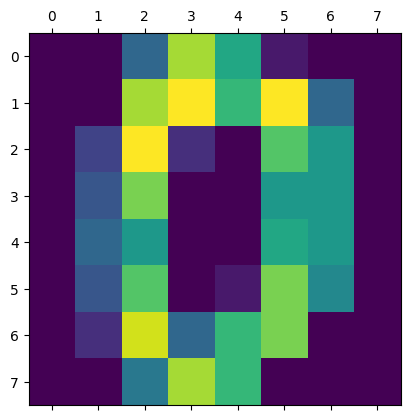

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digit=load_digits()
digit.images[0]
plt.matshow(digit.images[0])
plt.show()

In [ ]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
type(digit.images)

numpy.ndarray

In [ ]:
type(digit.data)

numpy.ndarray

In [ ]:
digit.data.shape

(1797, 64)

In [ ]:
digit.images.shape

(1797, 8, 8)

In [ ]:
a = digit.data.reshape(1797, 8, 8)
b = digit.images

In [ ]:
import numpy as np
np.allclose(a, b)

True

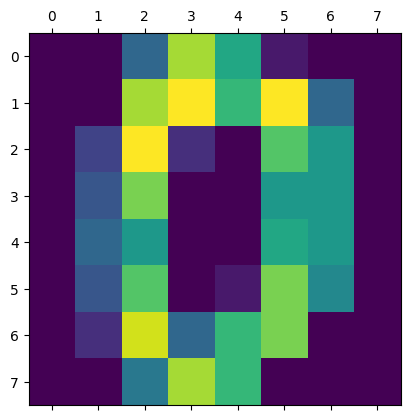

In [ ]:
plt.matshow(digit.data.reshape(1797, 8, 8)[0])
plt.show()

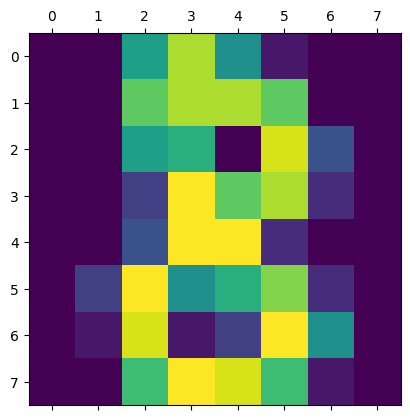

In [ ]:
plt.matshow(digit.images[8])
plt.show()

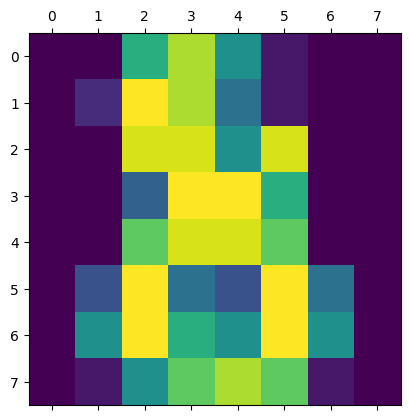

In [ ]:
plt.matshow(digit.images[1796])
plt.show()

In [ ]:
digit.target[1796]

8

In [ ]:
digit.target[-1]

8

# 실습 7. 전결합형(Fully conneded) 신경망

In [ ]:
import torch.nn as nn

# 신경망 정의
class SimpleNN(nn.Module):
  def __init__(self, input_size, output_size):
    super(SimpleNN, self).__init__()
    self.fc = nn.Linear(input_size, output_size)

  def forward(self, x):
    x = self.fc(x)
    return x

# 실습 8. 학습 전 추론: 더미 데이터

In [ ]:
digit.data.shape

(1797, 64)

In [ ]:
import numpy as np
import torch
x = torch.tensor(np.random.rand(64), dtype=torch.float32)

print(x.shape)
print(x.dtype)

torch.Size([64])
torch.float32


In [ ]:
model = SimpleNN(64, 10)
model

SimpleNN(
  (fc): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
y = model.forward(x)
y

tensor([-0.8237, -0.4871,  0.3815,  0.0292,  0.1896,  0.1588, -0.8068,  0.3778,
        -0.2055, -0.5077], grad_fn=<ViewBackward0>)

In [ ]:
print(torch.argmax(model.forward(x)).item())

2


# 실습 9. 학습 전 추론: 테스트 데이터


In [ ]:
digit.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
digit.target[0]

0

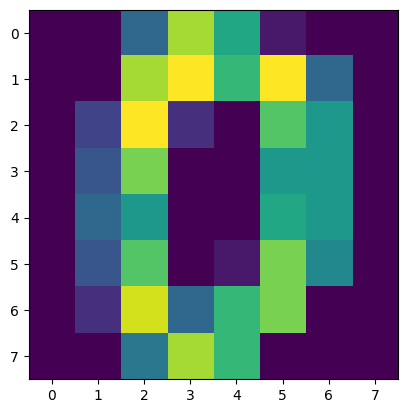

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(digit.images[0])

In [ ]:
digit.data[0].shape

(64,)

In [ ]:
digit.data[0].dtype

dtype('float64')

In [ ]:
x0 = torch.tensor(digit.data[0], dtype=torch.float32)
print(x0.dtype)

torch.float32


In [ ]:
torch.argmax(model(x0)).item()

5

In [ ]:
x1 = torch.tensor(digit.data[1], dtype=torch.float32)
print(f"answer: {digit.target[1]}")
print(f"predicted: {torch.argmax(model(x1)).item()}")

answer: 1
predicted: 7


# 실습 10. 전처리: 데이터 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler
X = digit.data
y = digit.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
data = np.array([[1, 2, 3], [4, 5, 6]])

scaler = StandardScaler()
data_norm = scaler.fit_transform(data)

print(data_norm)

[[-1. -1. -1.]
 [ 1.  1.  1.]]


In [ ]:
print(data_norm.mean()) # 정규화된 데이터의 평균
print(data_norm.var())  # 정규화된 데이터의 분산

0.0
1.0


# 실습 11. 학습 및 테스트 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2,random_state=42)
print(len(X_train))
print(len(X_test))
print(len(X_test)/(len(X_train)+len(X_test)))

1437
360
0.2003338898163606


# 실습 12. 신경망 학습

In [ ]:
import torch.optim as optim

# 파이토치 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# 손실함수 및 최적화 기법 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 모델 학습
num_epochs = 100
for epoch in range(num_epochs):
  optimizer.zero_grad()
  outputs = model(X_train)
  loss = criterion(outputs, y_train)
  loss.backward()
  optimizer.step()

# 실습 13. 성과 평가

In [ ]:
from sklearn.metrics import accuracy_score

# 모델의 평가
with torch.no_grad():
  outputs = model(X_test)
  _, predicted = torch.max(outputs, 1)

  accuracy = accuracy_score(y_test, predicted.numpy())
  print("Test accuracy:", accuracy)

Test accuracy: 0.7777777777777778


In [ ]:
outputs = model(X_test)
print(f"입력 데이터 형태:{X_test.shape}")
print(f"출력 데이터 형태:{outputs.shape}")
print(f"출력:{outputs}")

입력 데이터 형태:torch.Size([360, 64])
출력 데이터 형태:torch.Size([360, 10])
출력:tensor([[-0.3715,  0.5032, -0.2182,  ..., -0.5803,  0.2889,  0.2667],
        [-0.1018, -0.5505,  0.6350,  ...,  0.0036, -1.0563,  0.9043],
        [-0.4528,  0.1061,  0.1469,  ..., -0.2994,  0.0301,  0.6551],
        ...,
        [ 0.3131, -0.1026, -0.2545,  ...,  0.5422,  0.0375,  0.3093],
        [ 0.0573, -0.8106,  1.3097,  ..., -0.2010, -0.4647,  0.5516],
        [-0.1291, -0.9546,  0.7928,  ..., -0.8253, -1.0754,  1.1071]],
       grad_fn=<AddmmBackward0>)


In [ ]:
# 이걸 실행하면 코랩 오른쪽 화면에 도움말이 생성됨
torch.max?

In [ ]:
torch.allclose(predicted, torch.argmax(outputs, dim=1))

True

# 실습 14. 추론 및 시각화

In [ ]:
# 모델로 테스트 데이터 1 건 추론
import random

idx = random.randint(0, len(X_test)-1)
outputs = model(X_test[idx])
ans = y_test[idx].item()
pred = torch.argmax(outputs).item()

print(f"정답: {ans}")
print(f"예측값: {pred}")
print(f"결과:{ans==pred}")

정답: 4
예측값: 4
결과:True


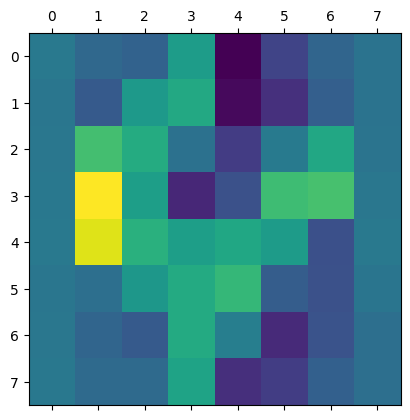

In [ ]:
plt.matshow(X_test[idx].reshape(8,8))

In [ ]:
random.randint?